In [12]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D
from vis import plot_behav, plot_rep

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

In [13]:
until_day = 24
days = np.arange(1, until_day + 1, 1)

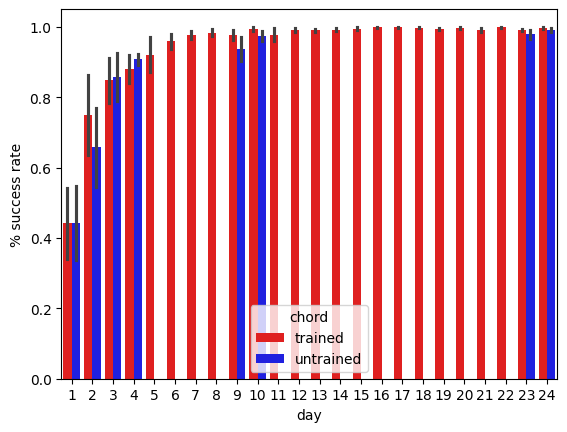

In [14]:
experiment = 'EFC_learningfMRI'
path = os.path.join(gl.baseDir, experiment, 'behavioural', 'single_trial_behaviour.tsv')
dat = pd.read_csv(path, sep='\t')

dat_tmp = dat.groupby(['subNum', 'session', 'day', 'chord']).mean(numeric_only=True).reset_index()
sb.barplot(x='day', y='trialPoint', hue='chord', data=dat_tmp, errorbar='se', palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('% success rate')
plt.show()

trained vs. untrained, day1: tval=1.212, pval=0.292
trained vs. untrained, day2: tval=0.454, pval=0.674
trained vs. untrained, day3: tval=0.240, pval=0.822
trained vs. untrained, day4: tval=1.446, pval=0.244
trained vs. untrained, day9: tval=-3.341, pval=0.029
trained vs. untrained, day10: tval=-2.368, pval=0.077
trained vs. untrained, day23: tval=-1.779, pval=0.150
trained vs. untrained, day24: tval=-0.979, pval=0.383


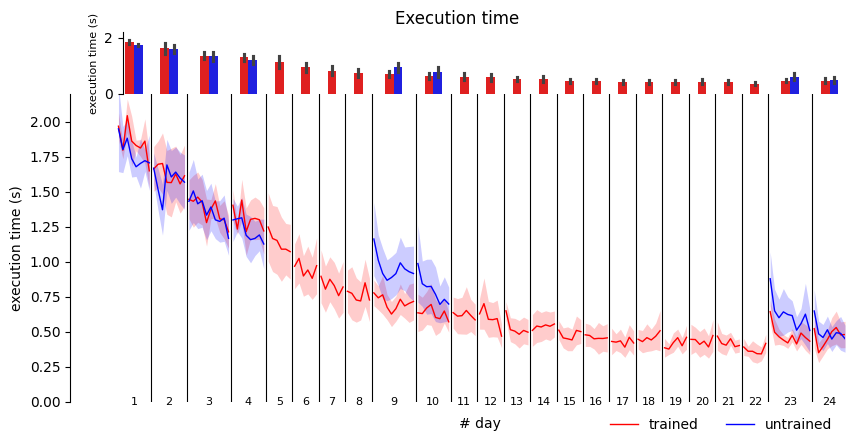

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
dat_s = dat[dat.trialPoint==1]
plot_behav(fig, ax, dat_s, metric='ET', ylim=[0, 2.2], ylabel='execution time (s)', title='Execution time')
plt.show()

trained vs. untrained, day1: tval=-0.075, pval=0.944
trained vs. untrained, day2: tval=-1.257, pval=0.277
trained vs. untrained, day3: tval=0.110, pval=0.918
trained vs. untrained, day4: tval=1.177, pval=0.324
trained vs. untrained, day9: tval=-2.447, pval=0.071
trained vs. untrained, day10: tval=-2.140, pval=0.099
trained vs. untrained, day23: tval=-2.216, pval=0.091
trained vs. untrained, day24: tval=-2.602, pval=0.060


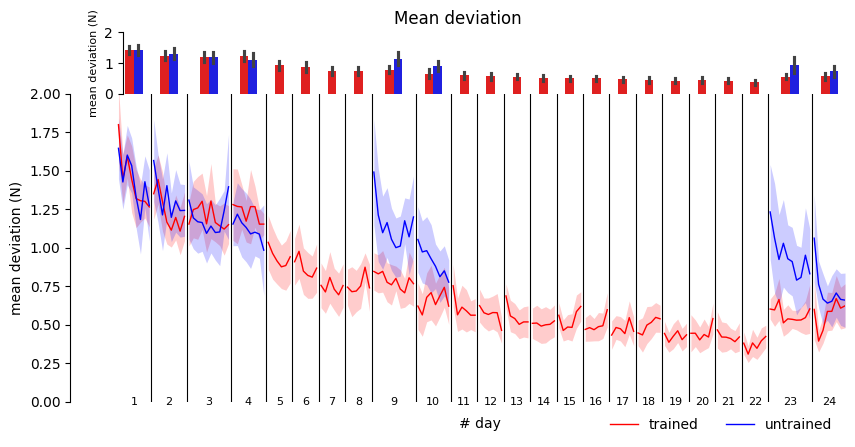

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, dat_s, metric='MD', ylim=[0, 2], ylabel='mean deviation (N)', title='Mean deviation',)
plt.show()

trained vs. untrained, day1: tval=0.130, pval=0.903
trained vs. untrained, day2: tval=0.871, pval=0.433
trained vs. untrained, day3: tval=0.363, pval=0.735
trained vs. untrained, day4: tval=1.093, pval=0.354
trained vs. untrained, day9: tval=1.386, pval=0.238
trained vs. untrained, day10: tval=0.753, pval=0.493
trained vs. untrained, day23: tval=0.081, pval=0.940
trained vs. untrained, day24: tval=3.397, pval=0.027


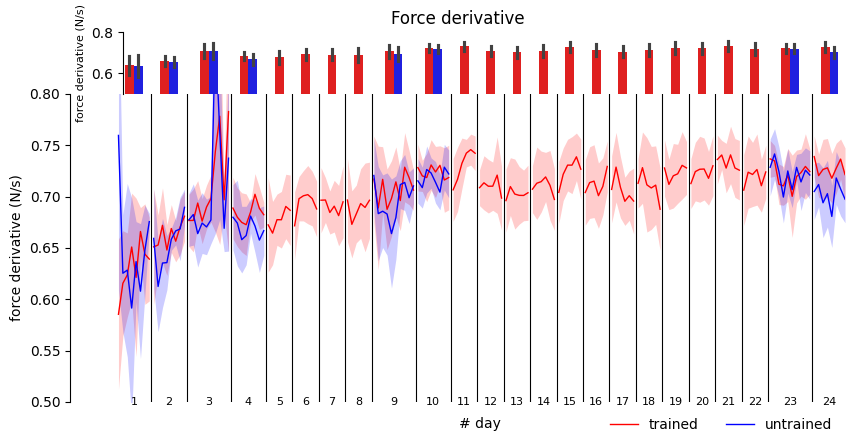

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_behav(fig, ax, dat_s, metric='force_der', ylim=[.5, .8], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', ylabel='force derivative (N/s)', title='Force derivative', )
plt.show()

trained vs. untrained, day1: tval=0.033, pval=0.975
trained vs. untrained, day2: tval=-0.563, pval=0.604
trained vs. untrained, day3: tval=2.141, pval=0.099
trained vs. untrained, day4: tval=0.779, pval=0.493
trained vs. untrained, day9: tval=2.016, pval=0.114
trained vs. untrained, day10: tval=2.969, pval=0.041
trained vs. untrained, day23: tval=0.376, pval=0.726
trained vs. untrained, day24: tval=5.383, pval=0.006


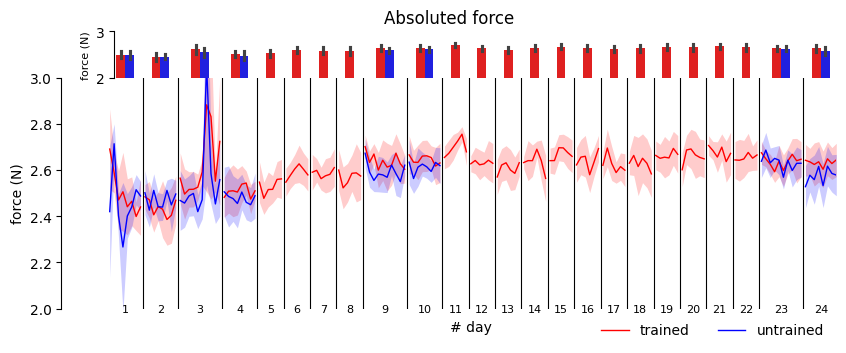

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_behav(fig, ax, dat_s, metric='force', ylim=[2, 3], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_abs', 'index_abs', 'middle_abs', 'ring_abs', 'pinkie_abs'], var_name='finger', ylabel='force (N)', title='Absoluted force', )
plt.show()

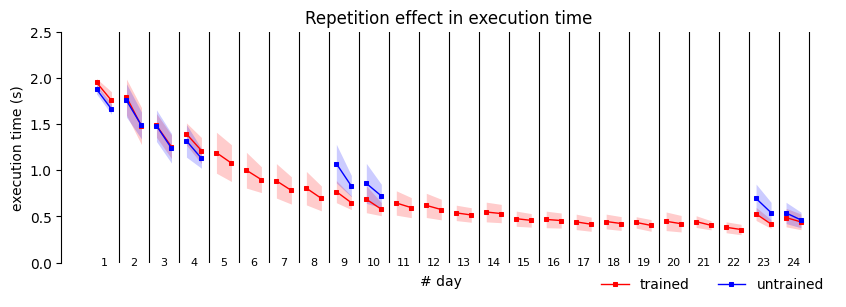

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_rep(fig, ax, dat_s, metric='ET', ylim=[0, 2.5], ylabel='execution time (s)', title='Repetition effect in execution time')
plt.show()

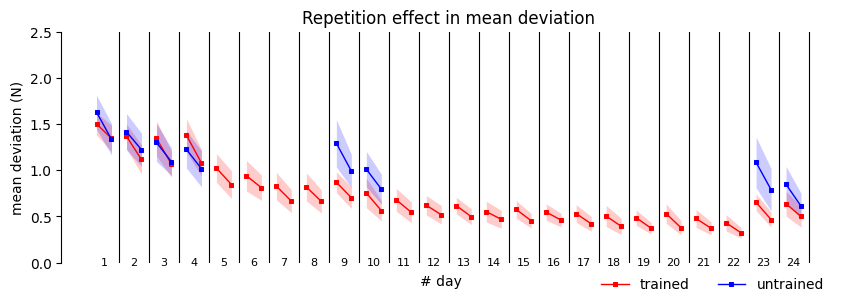

In [20]:
fig, ax = plt.subplots(figsize=(10, 3))
plot_rep(fig, ax, dat_s, metric='MD', ylim=[0, 2.5], ylabel='mean deviation (N)', title='Repetition effect in mean deviation')
plt.show()